In [4]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import phase2_common as ph2
from s4bb.spectra import XSpec, CalcSpec_namaster

In [3]:
params = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_nopbs_50.npy')
params = params.T
params.shape

(50, 12)

In [5]:
df = pd.DataFrame(params, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Detla_s'])
df

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,436.052821,0.000002,13.740947,-0.791522,1.653422,1.043733,-0.974401,-3.100469,0.022789,0.999207,0.998929
1,0.0,416.439644,0.000257,13.750240,-0.772612,1.659284,1.031037,-0.945855,-3.081691,0.004659,0.998953,0.999103
2,0.0,431.550324,-0.000056,13.736892,-0.753405,1.663986,1.007179,-0.866832,-3.090227,0.019242,0.999106,0.998925
3,0.0,451.249173,-0.000512,13.718908,-0.776096,1.655776,1.026281,-0.873033,-3.091138,0.022249,0.998794,0.998910
4,0.0,443.544720,-0.000216,13.734419,-0.772071,1.660816,1.037141,-0.881680,-3.098661,-0.005851,0.998911,0.999215
5,0.0,466.015178,-0.000164,13.735692,-0.778003,1.657730,1.043031,-0.912438,-3.089893,0.026616,0.998956,0.998985
6,0.0,517.824115,-0.000194,13.770180,-0.771403,1.647438,1.008572,-0.837128,-3.104580,0.016287,0.998980,0.998777
7,0.0,461.635993,0.000236,13.718988,-0.769600,1.652585,1.000646,-0.842661,-3.091725,0.005950,0.999232,0.999114
8,0.0,393.043951,-0.000331,13.715751,-0.771093,1.650617,1.040251,-0.918550,-3.078343,0.019033,0.999015,0.998924
9,0.0,430.439376,0.000194,13.732200,-0.788177,1.639556,1.021363,-0.909289,-3.100929,0.006728,0.998610,0.999401


In [11]:
df.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,442.176548,-0.000068,13.748940,-0.774573,1.651413,1.029950,-0.886295,-3.094706,0.019476,0.999059,0.999092
std,0.0,29.959201,0.000242,0.086758,0.012646,0.005854,0.035535,0.065654,0.010036,0.012037,0.000199,0.000231
min,0.0,373.495920,-0.000730,13.697056,-0.813246,1.639556,0.970373,-1.072872,-3.118094,-0.009503,0.998610,0.998667
25%,0.0,422.443210,-0.000194,13.721849,-0.780304,1.647455,1.009120,-0.917714,-3.101691,0.012367,0.998911,0.998926
50%,0.0,440.012166,-0.000059,13.730803,-0.774428,1.651103,1.023021,-0.876678,-3.094271,0.020728,0.999045,0.999074
75%,0.0,461.603813,0.000082,13.738672,-0.768501,1.654818,1.036178,-0.841223,-3.088169,0.026535,0.999203,0.999259
max,0.0,517.824115,0.000433,14.232367,-0.739669,1.663986,1.151471,-0.750378,-3.074794,0.047818,0.999469,0.999581


In [7]:
means = df.mean()
stds = df.std()

summary = pd.DataFrame({
    'Mean': means,
    'Std Dev': stds,
    'Mean ± Std': [f"{m:.2f} ± {s:.2f}" for m, s in zip(means, stds)]
})
summary

,Mean,Std Dev,Mean ± Std
status,0.000000,0.000000,0.00 ± 0.00
fval,442.176548,29.959201,442.18 ± 29.96
r,-0.000068,0.000242,-0.00 ± 0.00
A_d,13.748940,0.086758,13.75 ± 0.09
alpha_d,-0.774573,0.012646,-0.77 ± 0.01
beta_d,1.651413,0.005854,1.65 ± 0.01
A_s,1.029950,0.035535,1.03 ± 0.04
alpha_s,-0.886295,0.065654,-0.89 ± 0.07
beta_s,-3.094706,0.010036,-3.09 ± 0.01
epsilon,0.019476,0.012037,0.02 ± 0.01


In [51]:
params_100 = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_nopbs.npy')
params_100 = params_100.T
params_100.shape

(100, 12)

In [52]:
df_100 = pd.DataFrame(params_100, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Detla_s'])
df_100

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,394.239794,0.000117,13.731893,-0.779747,1.652269,1.071470,-1.015175,-3.099542,0.029135,0.999256,0.999085
1,0.0,368.155222,0.000464,13.739964,-0.766837,1.657703,1.051904,-0.971050,-3.082530,0.007075,0.998914,0.999218
2,0.0,381.238745,0.000221,13.724776,-0.760714,1.662788,1.026995,-0.894916,-3.092766,0.024432,0.999154,0.999045
3,0.0,411.429726,-0.000303,13.712039,-0.773559,1.657008,1.049792,-0.895894,-3.093322,0.023708,0.998777,0.999023
4,0.0,425.974256,-0.000045,13.719859,-0.761884,1.662303,1.063440,-0.934404,-3.096584,0.002165,0.999180,0.999248
5,0.0,406.958853,-0.000010,13.729802,-0.782047,1.657237,1.057571,-0.927604,-3.095745,0.029211,0.998996,0.999097
6,0.0,455.502141,-0.000027,13.725369,-0.769532,1.647033,1.016706,-0.851553,-3.105520,0.018180,0.998995,0.998884
7,0.0,407.172291,0.000312,13.711998,-0.773173,1.650501,1.026674,-0.888344,-3.089353,0.008000,0.999181,0.999167
8,0.0,349.806632,-0.000121,13.712780,-0.774005,1.648158,1.052120,-0.926758,-3.080431,0.023397,0.998899,0.999015
9,0.0,411.321621,0.000156,13.717318,-0.782779,1.642745,1.044624,-0.937159,-3.095947,0.018018,0.998911,0.999523


In [53]:
df_100.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.0,395.208287,0.000073,13.728121,-0.774704,1.651080,1.051979,-0.923193,-3.094808,0.021891,0.999094,0.999165
std,0.0,30.593309,0.000257,0.093198,0.011869,0.005167,0.028259,0.057889,0.009978,0.010488,0.000216,0.000218
min,0.0,323.413132,-0.000480,13.695077,-0.844804,1.638340,1.007525,-1.087960,-3.119423,-0.006948,0.998503,0.998655
25%,0.0,375.609754,-0.000108,13.712904,-0.780506,1.647624,1.035682,-0.951001,-3.102540,0.013513,0.998935,0.999037
50%,0.0,393.549383,0.000093,13.719298,-0.776044,1.650875,1.046806,-0.909748,-3.094426,0.022284,0.999103,0.999174
75%,0.0,411.323160,0.000227,13.726426,-0.769608,1.654530,1.056805,-0.886550,-3.087630,0.028312,0.999273,0.999296
max,0.0,505.335441,0.000650,14.644943,-0.724673,1.664239,1.144032,-0.817228,-3.071941,0.048366,0.999543,0.999602


In [57]:
means_100 = df_100.mean()
stds_100 = df_100.std()

summary_100 = pd.DataFrame({
    'Mean': means_100,
    'Std Dev': stds_100,
    'Mean ± Std': [f"{m:.2f} ± {s:.2f}" for m, s in zip(means_100, stds_100)]
})
summary_100

,Mean,Std Dev,Mean ± Std
status,0.000000,0.000000,0.00 ± 0.00
fval,395.208287,30.593309,395.21 ± 30.59
r,0.000073,0.000257,0.00 ± 0.00
A_d,13.728121,0.093198,13.73 ± 0.09
alpha_d,-0.774704,0.011869,-0.77 ± 0.01
beta_d,1.651080,0.005167,1.65 ± 0.01
A_s,1.051979,0.028259,1.05 ± 0.03
alpha_s,-0.923193,0.057889,-0.92 ± 0.06
beta_s,-3.094808,0.009978,-3.09 ± 0.01
epsilon,0.021891,0.010488,0.02 ± 0.01


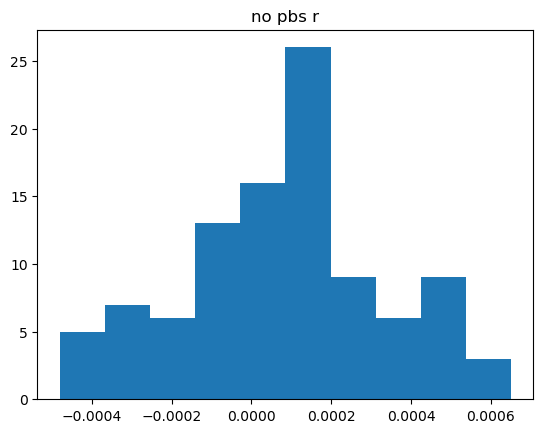

In [59]:
plt.hist(df_100['r'])
plt.title('no pbs r')
plt.show()

In [25]:
params_pbs = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs.npy')
params_pbs = params_pbs.T
params_pbs.shape

(100, 12)

In [35]:
df_pbs = pd.DataFrame(params_pbs, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Detla_s'])
pd.set_option('display.max_rows', 100)
df_pbs

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,37.621859,0.000988,23.711010,-1.159462,1.600464,0.989936,-0.105628,-3.136271,-0.001804,1.000417,0.998694
1,0.0,365.084259,0.000958,14.364084,-0.838507,1.656249,1.091398,-1.007304,-3.093377,0.005800,0.999533,0.999496
2,0.0,108.874437,0.002517,7.644014,-0.413427,1.727622,1.078645,-1.264809,-3.080957,0.127698,0.998532,0.998196
3,0.0,406.594923,0.000273,13.746749,-0.773996,1.646800,1.055115,-0.915254,-3.108021,0.028304,0.999668,0.999180
4,0.0,331.637632,0.000537,14.104126,-0.745862,1.629921,0.943080,-0.682558,-3.081223,-0.011904,1.000693,0.999607
5,0.0,228.566966,0.000576,13.093059,-0.812917,1.694464,1.194981,-1.381692,-3.070744,0.122283,0.999104,0.999328
6,0.0,384.979708,0.000365,13.763636,-0.735521,1.628757,1.096501,-0.931683,-3.093846,-0.014776,1.000073,0.999242
7,0.0,304.035895,0.001175,16.502446,-0.876054,1.615648,0.939501,-0.561080,-3.097277,-0.021691,1.000635,0.999635
8,0.0,379.779893,-0.000284,15.279252,-0.875075,1.647605,1.044317,-0.914075,-3.088405,0.020292,0.999045,0.999014
9,0.0,335.146764,0.000194,16.894745,-0.879493,1.618655,0.983778,-0.696023,-3.108755,-0.065392,1.000283,0.999457


In [42]:
df_pbs_clean = df_pbs.drop([26, 27, 77])
df_pbs_clean

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
0,0.0,37.621859,0.000988,23.711010,-1.159462,1.600464,0.989936,-0.105628,-3.136271,-0.001804,1.000417,0.998694
1,0.0,365.084259,0.000958,14.364084,-0.838507,1.656249,1.091398,-1.007304,-3.093377,0.005800,0.999533,0.999496
2,0.0,108.874437,0.002517,7.644014,-0.413427,1.727622,1.078645,-1.264809,-3.080957,0.127698,0.998532,0.998196
3,0.0,406.594923,0.000273,13.746749,-0.773996,1.646800,1.055115,-0.915254,-3.108021,0.028304,0.999668,0.999180
4,0.0,331.637632,0.000537,14.104126,-0.745862,1.629921,0.943080,-0.682558,-3.081223,-0.011904,1.000693,0.999607
5,0.0,228.566966,0.000576,13.093059,-0.812917,1.694464,1.194981,-1.381692,-3.070744,0.122283,0.999104,0.999328
6,0.0,384.979708,0.000365,13.763636,-0.735521,1.628757,1.096501,-0.931683,-3.093846,-0.014776,1.000073,0.999242
7,0.0,304.035895,0.001175,16.502446,-0.876054,1.615648,0.939501,-0.561080,-3.097277,-0.021691,1.000635,0.999635
8,0.0,379.779893,-0.000284,15.279252,-0.875075,1.647605,1.044317,-0.914075,-3.088405,0.020292,0.999045,0.999014
9,0.0,335.146764,0.000194,16.894745,-0.879493,1.618655,0.983778,-0.696023,-3.108755,-0.065392,1.000283,0.999457


In [43]:
df_pbs_clean.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.0,135.141642,0.000866,13.925433,-0.739081,1.665110,1.057855,-0.872951,-3.076908,0.029197,1.000185,0.995507
std,0.0,572.226088,0.002738,5.179816,0.300485,0.100622,0.391437,0.381952,0.131789,0.077853,0.010725,0.034213
min,0.0,-4457.486103,-0.015340,1.305401,-1.480377,1.210470,0.465533,-2.000000,-3.231758,-0.164364,0.969845,0.662165
25%,0.0,162.557039,0.000242,12.154691,-0.876054,1.620421,0.947858,-1.024154,-3.110870,-0.026392,0.998670,0.998720
50%,0.0,283.753981,0.000528,13.746749,-0.773996,1.647605,1.007026,-0.933476,-3.097888,0.023877,0.999350,0.999155
75%,0.0,356.244265,0.001070,15.882947,-0.683520,1.681944,1.065389,-0.682558,-3.082022,0.091670,1.000417,0.999525
max,0.0,417.326438,0.015358,38.116466,0.500000,2.000000,3.496299,0.347290,-2.189465,0.233110,1.100000,1.000338


In [62]:
df_pbs.describe()

,status,fval,r,A_d,alpha_d,beta_d,A_s,alpha_s,beta_s,epsilon,Delta_d,Detla_s
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.060000,-2862.011940,0.532225,13.692379,-0.717893,1.671666,1.056663,-0.894887,-3.071571,0.022206,1.001934,0.988652
std,0.342893,23573.813985,5.313739,5.485316,0.341108,0.109737,0.403478,0.408263,0.148808,0.117602,0.016228,0.059077
min,0.000000,-225586.352377,-0.015340,0.000020,-1.480377,1.210470,0.447348,-2.000000,-3.248107,-0.835752,0.969845,0.640309
25%,0.000000,138.063463,0.000239,11.763470,-0.876914,1.620664,0.945365,-1.039685,-3.110943,-0.026548,0.998670,0.998694
50%,0.000000,279.899144,0.000532,13.732996,-0.771081,1.648446,1.005390,-0.933976,-3.097611,0.022085,0.999415,0.999154
75%,0.000000,355.719753,0.001085,16.037822,-0.679552,1.685195,1.066966,-0.692657,-3.081156,0.091841,1.000433,0.999503
max,2.000000,417.326438,53.138231,38.116466,0.500000,2.000000,3.496299,0.347290,-2.189465,0.235248,1.100000,1.000338


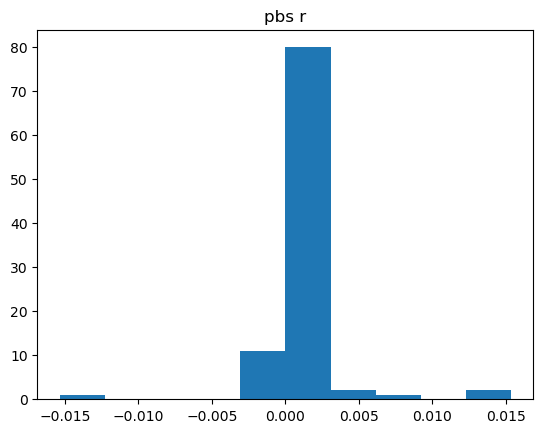

In [61]:
plt.hist(df_pbs_clean['r'])
plt.title('pbs r')
plt.show()

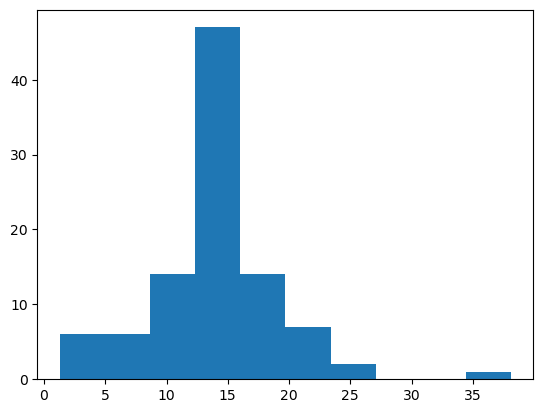

In [49]:
plt.hist(df_pbs_clean['A_d'])
plt.show()